In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [29]:
train_data = pd.read_csv('/Users/ikartik/Desktop/python/jupyter/titanic/train.csv')
test_data = pd.read_csv('/Users/ikartik/Desktop/python/jupyter/titanic/test.csv')

In [30]:
train_data.shape

(891, 12)

In [31]:
test_data.shape

(418, 11)

In [32]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [35]:
train_data.Sex.replace(['male', 'female'], [1, 0], inplace=True)
test_data.Sex.replace(['male', 'female'], [1, 0], inplace=True)

In [36]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

pclass-discrete
sibsp-dis
parch-dis
sex-now disc

<AxesSubplot:>

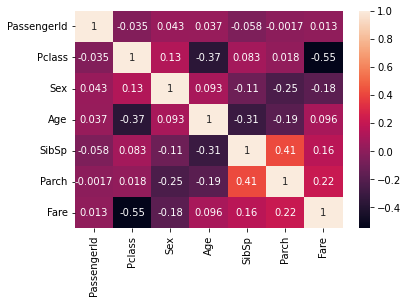

In [37]:
sns.heatmap(train_data.drop('Survived',axis =1).corr(), annot=True)

Correlations between features:

Pclass and Fare (-.55) = Richer people tend to pay more
Pclass and Age (-.37) = There are more older people among the richest?

SibSp and Age (-.31) = Older people tend to have less siblings and spouses alive

Sex and Parch (-.25) = There are more women with children than men with children?
Parch and Fare (.22) = Tickets for adults with little kids cost more?
Age and Parch (-.19) = Kids tend to travel with their parents
Sex and Fare (-.18) = Women paid less?
SibSp and Fare (.16) = Couples paid more?
Pclass and Sex (.13) = There are many poor men
Sex and SibSp (-.11) = More men traveled without spouses or siblings?
Age and Fare (.096) = There are more older people among the richest?
Age and Sex (.093) = There are more older men?
Pclass and SibSp (.083) = Poorer people tend to have bigger families?
Pclass and Parch (.018) = Poorer people tend to have bigger families?

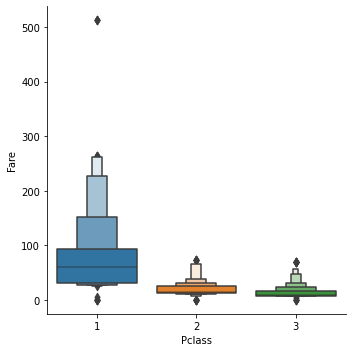

In [38]:
sns.catplot(x='Pclass',y='Fare', data=train_data, kind= 'boxen')

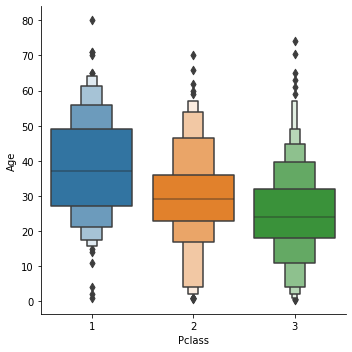

In [39]:
sns.catplot(x='Pclass',y='Age',data=train_data, kind='boxen')

In [40]:
train_data.Parch

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

Since people can only have 1 Spouse, and 2 Parents, let's add siblings and children as individual features

In [41]:
train_data['siblings']= abs(train_data.SibSp - 1)
train_data['children']= abs(train_data.Parch - 2)

test_data['siblings']= abs(train_data.SibSp - 1)
test_data['children']= abs(train_data.Parch - 2)

In [42]:
train_data.Parch

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [43]:
to_drop = ["Name","Ticket","Cabin"]

y_train = train_data.Survived
X_train = train_data.drop(to_drop, axis = 1).drop("Survived", axis = 1)
X_test  =  test_data.drop(to_drop, axis = 1)

num = [col for col in X_train.columns if X_train[col].dtypes != "object"]
cat = [col for col in X_train.columns if X_train[col].dtypes == "object"]
from sklearn.pipeline      import Pipeline
from sklearn.impute        import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose       import ColumnTransformer
from sklearn.ensemble      import RandomForestClassifier

num_transformer = SimpleImputer(strategy = "median", add_indicator=True)

cat_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy = "most_frequent")), \
                ("one_hot", OneHotEncoder(handle_unknown = 'ignore', sparse = False))])
                                  
preprocessor = ColumnTransformer(transformers=[('num',num_transformer, num), \
                                ('cat', cat_transformer, cat)])

In [44]:
model = RandomForestClassifier(max_depth=6, min_samples_split=8) 
#hyper parameters found by using cross_val_score manually
#automatization pending...

classifier = Pipeline(steps=[("preprocessor",preprocessor),("model",model)])

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train,
                              cv=5,)

print("CV score:", scores.mean())

CV score: 0.8283033080158182
